In [1]:
!pip install pandas scikit-learn numpy


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:

housing = pd.read_csv('/content/House price prediction/train.csv')
#housing = pd.DataFrame(pd.read_csv("train.csv"))
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [14]:
house=pd.DataFrame().assign(Price=housing['price'], Area=housing['area'], Bedrooms=housing['bedrooms'], Bathrooms=housing['bathrooms'])

# Data Cleaning - Check for null values
print(house.isnull().sum())

Price        0
Area         0
Bedrooms     0
Bathrooms    0
dtype: int64


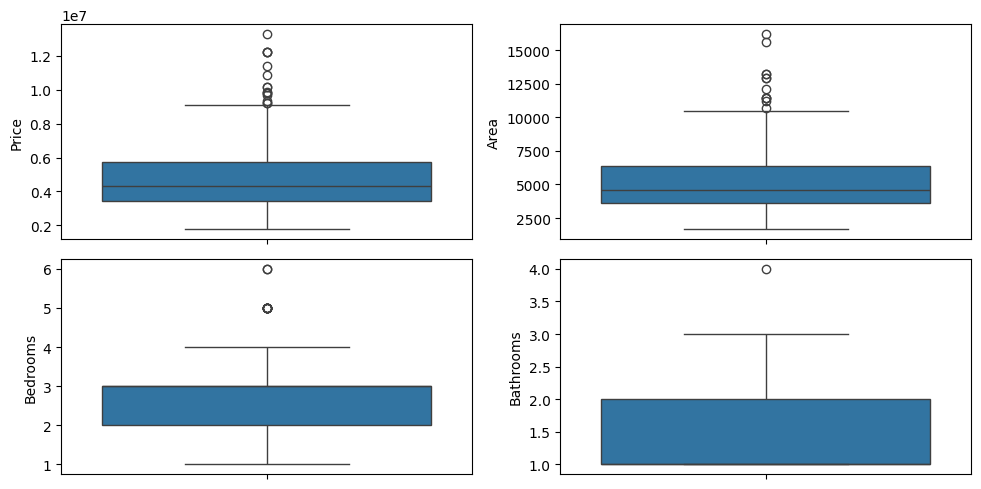

In [15]:
x=house.drop(columns='Price')
y=house['Price']

# Outlier Analysis
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(house['Price'], ax = axs[0,0])
plt2 = sns.boxplot(house['Area'], ax = axs[0,1])
plt1 = sns.boxplot(house['Bedrooms'], ax = axs[1,0])
plt2 = sns.boxplot(house['Bathrooms'], ax = axs[1,1])

plt.tight_layout()
plt.show()


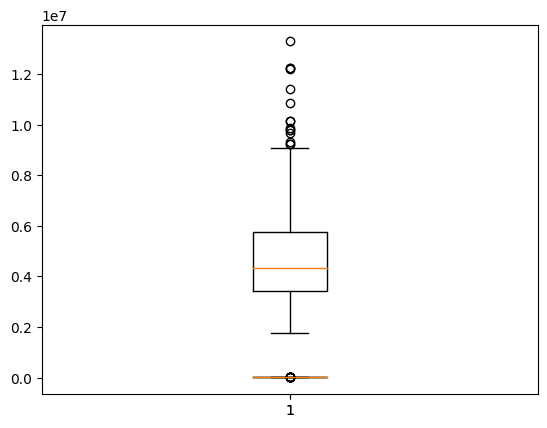

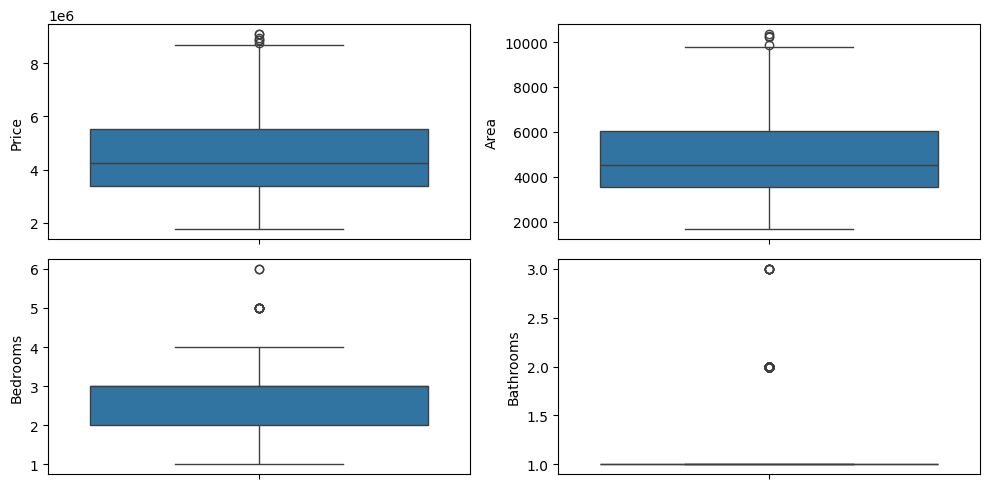

In [16]:
# Outlier treatment for price
plt.boxplot(house.Price)
Q1 = house.Price.quantile(0.25)
Q3 = house.Price.quantile(0.75)
IQR = Q3 - Q1
house = house[(house.Price >= Q1 - 1.5*IQR) & (house.Price <= Q3 + 1.5*IQR)]

# Outlier treatment for area
plt.boxplot(house.Area)
Q1 = house.Area.quantile(0.25)
Q3 = house.Area.quantile(0.75)
IQR = Q3 - Q1
house = house[(house.Area >= Q1 - 1.5*IQR) & (house.Area <= Q3 + 1.5*IQR)]

# Performing outlier analysis again
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(house['Price'], ax = axs[0,0])
plt2 = sns.boxplot(house['Area'], ax = axs[0,1])
plt1 = sns.boxplot(house['Bedrooms'], ax = axs[1,0])
plt2 = sns.boxplot(house['Bathrooms'], ax = axs[1,1])

plt.tight_layout()
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Machine Learning Model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

# Fitting
lr.fit(x_train, y_train)


c=lr.intercept_
print("Intercepts: ",c)

m=lr.coef_
print("Coefficients: ",m)

Intercepts:  -626271.7190235751
Coefficients:  [4.16068170e+02 5.07856439e+05 1.39752856e+06]


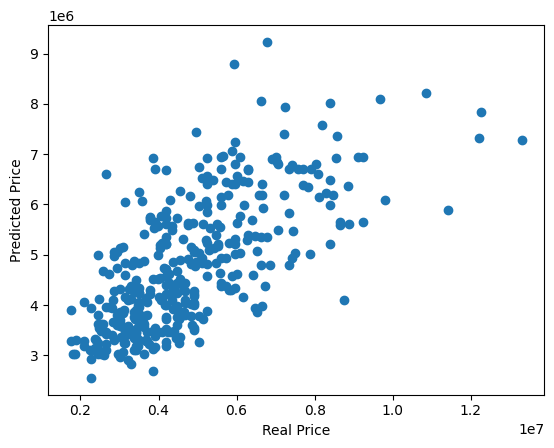

0.47275303230470844


In [18]:
#Predicting
y_pred_train=lr.predict(x_train)
#Visualization
plt.scatter(y_train, y_pred_train)
plt.xlabel("Real Price")
plt.ylabel("Predicted Price")
plt.show()

from sklearn.metrics import r2_score
print(r2_score(y_train, y_pred_train))